## 這段程式碼嘗試視覺化學習Data Mining很常使用的例子-Iris dataset~
credit to Ben Hamner: https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
# 首先import操作資料方便的pandas套件
import pandas as pd

# 然後import python一個很好視覺化的套件seaborn
import warnings # 因為版本問題，可能很多seaborn的warning所以就先忽略
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# 用pandas把資料讀進來
iris = pd.read_csv("iris-release-2016-01-12-01-48-31/iris/Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# 看看總共有多少Species？
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

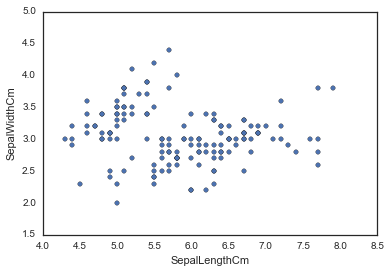

In [21]:
#pandas的DataFrame自帶的畫圖函數,用?iris.plot可以看到能夠被設定的參數,這裡選擇scatter plot
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

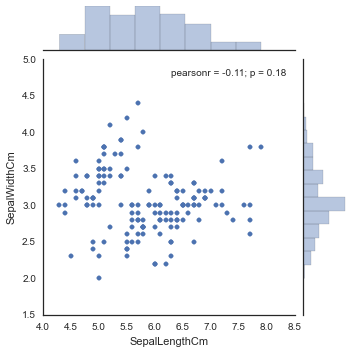

In [28]:
# 同樣的圖，我們也可以用seaborn的jointplot來畫，一樣用?可以看得到所有能夠調整的參數哦
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

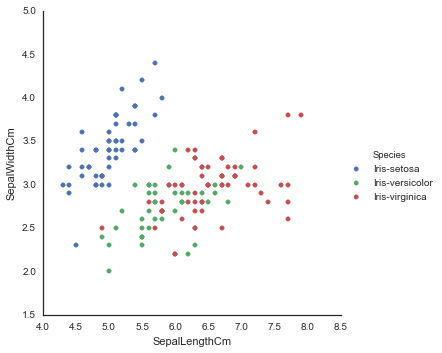

In [54]:
# 如果要在scatterplot上呈現這些點的分類，我們可以用FacetGrid
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend() #用來表示Species

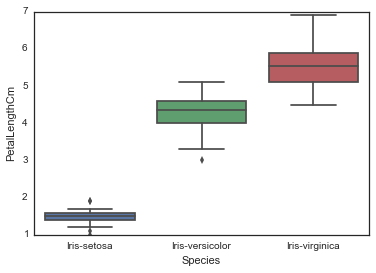

In [49]:
# 針對一個Feature的boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

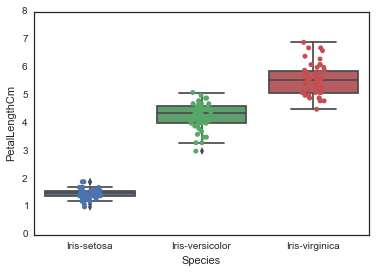

In [50]:
# 以下展現一個方法，讓我們可以同時呈現好幾個圖像
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

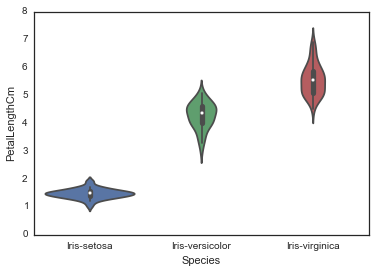

In [51]:
# violinplot是一個結合以上兩個圖像有點的畫法
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

In [52]:
?sns.kdeplot

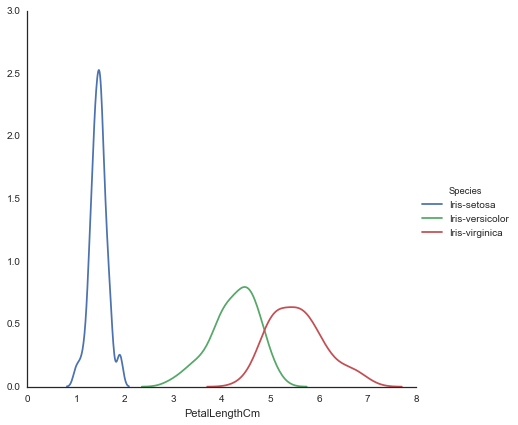

In [56]:
# 另外還有一個對於觀察單變量非常有用的kdeplot
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

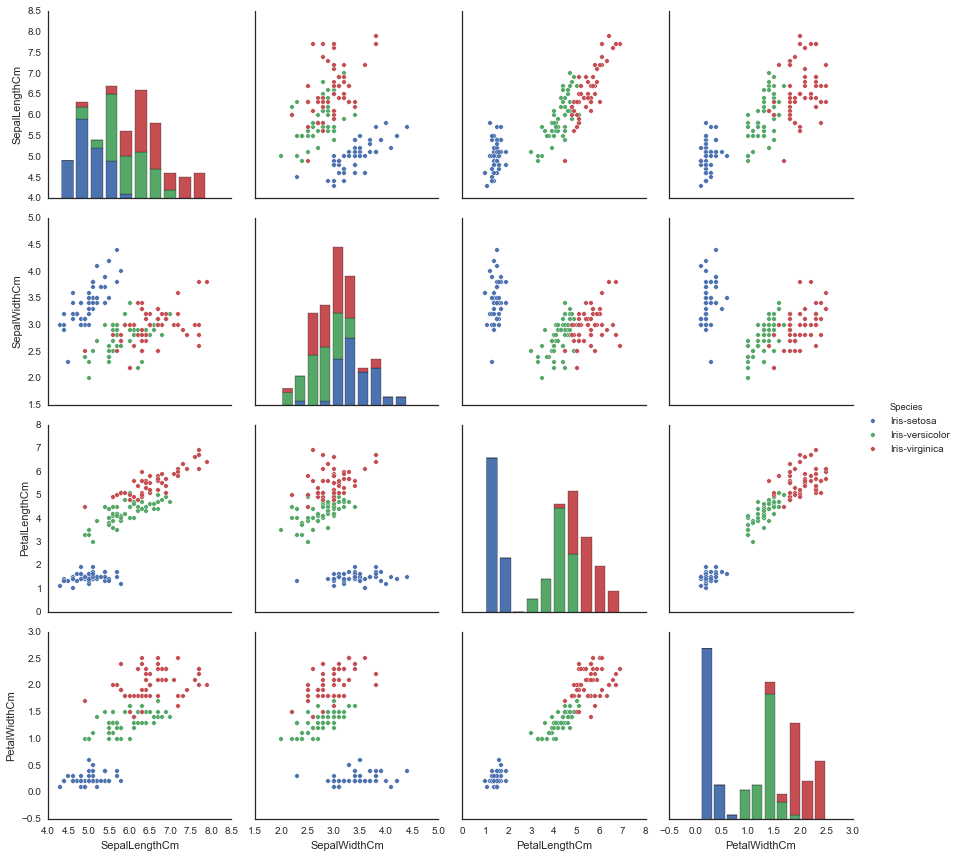

In [57]:
# 我個人覺得這個顯示兩兩變量之間的關係的圖非常有用!
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

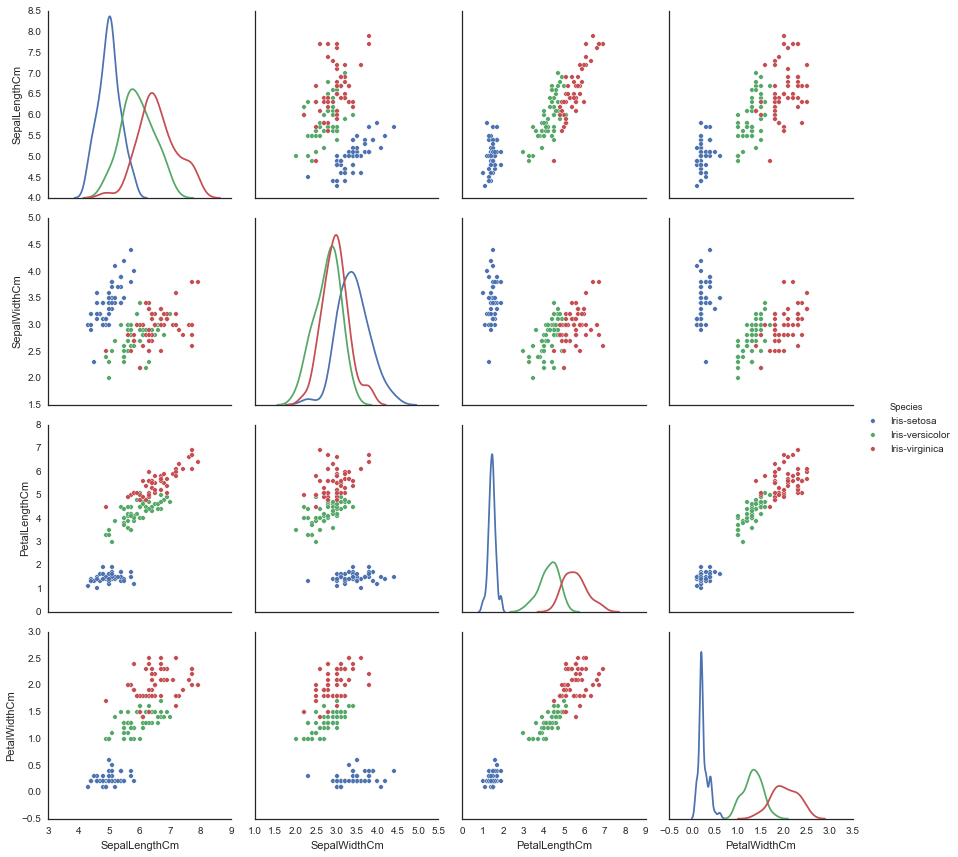

In [58]:
# 對角線上的圖default是用直方圖，我們可以換成kde，很清楚就發現petallenght和petalwidth有很不錯的分類效果!
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000032AAD208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000032D2C0B8>]], dtype=object)

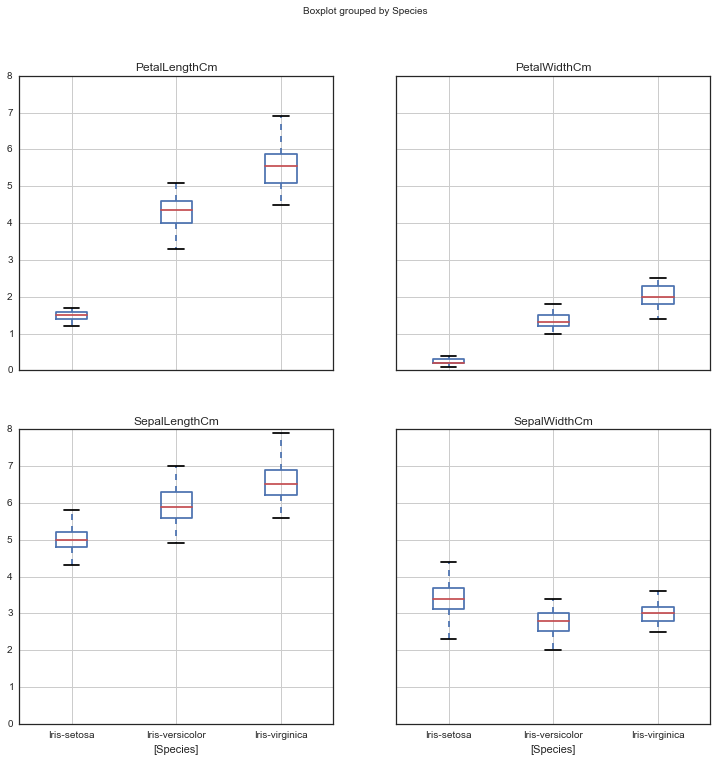

In [60]:
# 現在回到pandas的話，boxplot是這樣處理
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 12))

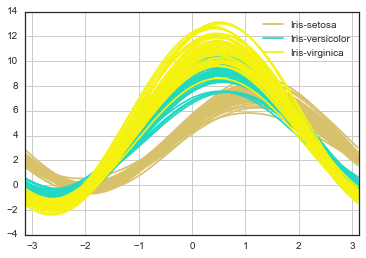

In [61]:
# pandas有一個很酷的工具叫Andrews Curves
# 這其實是把features當做傅里葉序列的係數所劃出來的圖
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

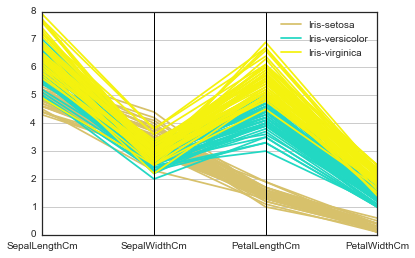

In [62]:
# 另外一個視覺化多維度屬性的工具是parallel_coordinates，從這裡也看出來Petallength和petalwidth效果比較好!
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

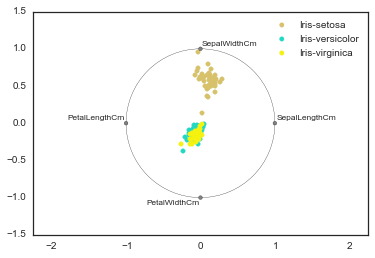

In [66]:
# 還有一個用雷達圖來視覺化的工具radviz，把features當成圓上的一點來看
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")